<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [61]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [107]:
from bs4 import BeautifulSoup
import requests


data = pd.read_csv("data/job_listings.csv")


##### Your Code Here #####

html_test = BeautifulSoup(data['description'][0], 'html.parser')
print(html_test.prettify())
             


b"
<div>
 <div>
  Job Requirements:
 </div>
 <ul>
  <li>
   <p>
    \nConceptual understanding in Machine Learning models like Nai\xc2\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them
   </p>
   \n
  </li>
  <li>
   <p>
    Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)
   </p>
   \n
  </li>
  <li>
   <p>
    Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R
   </p>
   \n
  </li>
  <li>
   <p>
    Ability to communicate Model findings to both Technical and Non-Technical stake holders
   </p>
   \n
  </li>
  <li>
   <p>
    Hands on experience in SQL/Hive or similar programming language
   </p>
   \n
  </li>
  <li>
   <p>
    Must show past work via GitHub, Kaggle or any other published article
   </p>
   \n
  </li>
  <

In [108]:
data.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [109]:
data.shape

(426, 3)

In [110]:
length = len(data)
print(length)

426


In [116]:
soup = BeautifulSoup(data['description'][0])
text_1 = soup.get_text()
print(text_1)

b"Job Requirements:\nConceptual understanding in Machine Learning models like Nai\xc2\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them\nIntermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)\nExposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R\nAbility to communicate Model findings to both Technical and Non-Technical stake holders\nHands on experience in SQL/Hive or similar programming language\nMust show past work via GitHub, Kaggle or any other published article\nMaster's degree in Statistics/Mathematics/Computer Science or any other quant specific field.\nApply Now"


In [118]:
# need the space in there
sample = re.sub('[^a-zA-Z ]', '', text_1)
print(sample)

bJob RequirementsnConceptual understanding in Machine Learning models like Naixcxave Bayes KMeans SVM Apriori Linear Logistic Regression Neural Random Forests Decision Trees KNN along with handson experience in at least  of themnIntermediate to expert level coding skills in PythonR Ability to write functions clean and efficient data manipulation are mandatory for this rolenExposure to packages like NumPy SciPy Pandas Matplotlib etc in Python or GGPlot dplyr tidyR in RnAbility to communicate Model findings to both Technical and NonTechnical stake holdersnHands on experience in SQLHive or similar programming languagenMust show past work via GitHub Kaggle or any other published articlenMasters degree in StatisticsMathematicsComputer Science or any other quant specific fieldnApply Now


In [119]:
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    # substitute with nothing
    tokens = re.sub('[^a-zA-Z ]', '', text)
    
    return tokens

In [121]:
print(text_1)

b"Job Requirements:\nConceptual understanding in Machine Learning models like Nai\xc2\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them\nIntermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)\nExposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R\nAbility to communicate Model findings to both Technical and Non-Technical stake holders\nHands on experience in SQL/Hive or similar programming language\nMust show past work via GitHub, Kaggle or any other published article\nMaster's degree in Statistics/Mathematics/Computer Science or any other quant specific field.\nApply Now"


In [122]:
no_new_lines = tokenize(text_1)

In [123]:
print(no_new_lines)

bJob RequirementsnConceptual understanding in Machine Learning models like Naixcxave Bayes KMeans SVM Apriori Linear Logistic Regression Neural Random Forests Decision Trees KNN along with handson experience in at least  of themnIntermediate to expert level coding skills in PythonR Ability to write functions clean and efficient data manipulation are mandatory for this rolenExposure to packages like NumPy SciPy Pandas Matplotlib etc in Python or GGPlot dplyr tidyR in RnAbility to communicate Model findings to both Technical and NonTechnical stake holdersnHands on experience in SQLHive or similar programming languagenMust show past work via GitHub Kaggle or any other published articlenMasters degree in StatisticsMathematicsComputer Science or any other quant specific fieldnApply Now


In [125]:
big_test_list = []

for i in range(length): 
    soup = BeautifulSoup(data['description'][i])
    text = soup.get_text()
    no_new_lines = tokenize(text)
    big_test_list += [no_new_lines] 

print(big_test_list)
# print(text)

['bJob RequirementsnConceptual understanding in Machine Learning models like Naixcxave Bayes KMeans SVM Apriori Linear Logistic Regression Neural Random Forests Decision Trees KNN along with handson experience in at least  of themnIntermediate to expert level coding skills in PythonR Ability to write functions clean and efficient data manipulation are mandatory for this rolenExposure to packages like NumPy SciPy Pandas Matplotlib etc in Python or GGPlot dplyr tidyR in RnAbility to communicate Model findings to both Technical and NonTechnical stake holdersnHands on experience in SQLHive or similar programming languagenMust show past work via GitHub Kaggle or any other published articlenMasters degree in StatisticsMathematicsComputer Science or any other quant specific fieldnApply Now', 'bJob DescriptionnnAs a Data Scientist  you will help us build machine learning models data pipelines and microservices to help our clients navigate their healthcare journey You will do so by empowering a

In [112]:
""" Import Statements """

# Classics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

import spacy
nlp = spacy.load("en_core_web_lg")

## 2) Use Spacy to tokenize the listings 

In [126]:
doc = nlp(no_new_lines)

In [127]:
print([token.lemma_ for token in doc if (token.is_stop != True) and (token.is_punct != True)])

['bCerner', 'Intelligence', 'new', 'innovative', 'organization', 'Cerner', 'focus', 'create', 'contextual', 'intelligent', 'experience', 'leverage', 'power', 'datum', 'discover', 'new', 'evidencebased', 'insight', 'workflow', 'intervention', 'drive', 'client', 'value', 'help', 'achieve', 'quadruple', 'aim', 'healthcare', 'seek', 'good', 'bright', 'talent', 'join', 'team', 'xexx', 'individual', 'thrive', 'analytical', 'problem', 'solve', 'datadriven', 'analysis', 'smart', 'ambitious', 'inquisitivenna', 'Data', 'scientist', 'discover', 'develop', 'mathematical', 'model', 'improve', 'clinical', 'financial', 'operational', 'outcome', 'individual', 'facility', 'population', 'level', 'advanced', 'mathematical', 'computational', 'machine', 'learning', 'technique', 'responsibility', 'include', 'support', 'feasibility', 'study', 'apply', 'modern', 'datum', 'storage', 'technique', 'discover', 'explanatory', 'feature', 'highdimensionality', 'collection', 'datum', 'explore', 'datum', 'scientifical

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [128]:
print(no_new_lines)

bCerner Intelligence is a new innovative organization within Cerner focusing on creating contextual intelligent experiences by leveraging the power of data to discover new evidencebased insights and workflow interventions that drive client value and help achieve the quadruple aim in healthcare We seek the best and brightest talent to join the team xexx individuals who thrive on analytical problem solving and datadriven analysis who are smart ambitious and inquisitivennAs a Data Scientist you will discover and develop mathematical models to improve clinical financial or operational outcomes at an individual facility or population level using advanced mathematical computational and machine learning techniques A few of the responsibilities include supporting feasibility studies applying modern data storage techniques discovering explanatory features in highdimensionality collections of data exploring data using scientifically valid techniques to applying a modern software or analytic deve

In [129]:
test_list = []
test_list += [no_new_lines] 

In [145]:
from sklearn.feature_extraction.text import CountVectorizer

# create the transformer
vect = CountVectorizer()

# build vocab
vect.fit(big_test_list)

# transform text
dtm = vect.transform(big_test_list)

# Create a Vocabulary
# The vocabulary establishes all of the possible words that we might use.

# The vocabulary dictionary does not represent the counts of words!!

In [146]:
type(dtm.todense())

numpy.matrix

In [147]:
print(vect.get_feature_names())

['aa', 'aaai', 'aaeeo', 'aas', 'ab', 'abernathy', 'abilities', 'abilitiesnability', 'abilitiesndevelops', 'abilitiesnexperience', 'abilitiesnninterpersonal', 'abilitiesnproblem', 'abilitiesnsolid', 'ability', 'abilitynable', 'abilitynpossess', 'able', 'abmultivariate', 'abounds', 'about', 'aboutnresponsibilitiesndata', 'aboutnyouxexxll', 'above', 'abovenproficiency', 'abovenstatistical', 'abroad', 'absence', 'absolutely', 'absorbing', 'abstract', 'abstracting', 'abstraction', 'abstractions', 'abstractly', 'abtest', 'abundant', 'abuse', 'academia', 'academic', 'academicnfield', 'academics', 'academies', 'accelerate', 'accelerates', 'accelerating', 'accelerationnndo', 'accelerator', 'accelerometer', 'accept', 'acceptable', 'acceptance', 'acceptapprove', 'accepted', 'acceptedcurrent', 'accepting', 'access', 'accessibility', 'accessible', 'accessing', 'accidental', 'accolade', 'accolades', 'accommodate', 'accommodating', 'accommodation', 'accommodations', 'accommodationsnplease', 'accommod

In [133]:
test_list[:25]

['bCerner Intelligence is a new innovative organization within Cerner focusing on creating contextual intelligent experiences by leveraging the power of data to discover new evidencebased insights and workflow interventions that drive client value and help achieve the quadruple aim in healthcare We seek the best and brightest talent to join the team xexx individuals who thrive on analytical problem solving and datadriven analysis who are smart ambitious and inquisitivennAs a Data Scientist you will discover and develop mathematical models to improve clinical financial or operational outcomes at an individual facility or population level using advanced mathematical computational and machine learning techniques A few of the responsibilities include supporting feasibility studies applying modern data storage techniques discovering explanatory features in highdimensionality collections of data exploring data using scientifically valid techniques to applying a modern software or analytic de

In [148]:
print(dtm)

  (0, 13)	1
  (0, 423)	1
  (0, 645)	2
  (0, 708)	2
  (0, 831)	1
  (0, 858)	1
  (0, 920)	1
  (0, 1009)	1
  (0, 1300)	1
  (0, 1552)	1
  (0, 1643)	1
  (0, 2361)	1
  (0, 2492)	1
  (0, 2606)	1
  (0, 3343)	1
  (0, 3576)	1
  (0, 3663)	1
  (0, 4275)	1
  (0, 4477)	1
  (0, 4910)	1
  (0, 5170)	2
  (0, 5314)	1
  (0, 5555)	1
  (0, 5636)	1
  (0, 5769)	1
  :	:
  (425, 15620)	1
  (425, 15634)	1
  (425, 15697)	1
  (425, 15724)	1
  (425, 15772)	1
  (425, 15819)	1
  (425, 15871)	1
  (425, 15913)	2
  (425, 15990)	1
  (425, 15998)	1
  (425, 16000)	1
  (425, 16006)	2
  (425, 16026)	3
  (425, 16028)	1
  (425, 16062)	10
  (425, 16064)	2
  (425, 16069)	1
  (425, 16083)	6
  (425, 16089)	1
  (425, 16102)	1
  (425, 16128)	1
  (425, 16214)	2
  (425, 16281)	2
  (425, 16310)	3
  (425, 16352)	1


In [149]:
# Dealing with Sparse Matrix
dtm.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [150]:
type(dtm)

scipy.sparse.csr.csr_matrix

In [151]:
# Get Word Counts for each document
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtm

,aa,aaai,aaeeo,aas,ab,abernathy,abilities,abilitiesnability,abilitiesndevelops,abilitiesnexperience,...,zeus,zf,zfxexxs,zheng,zillow,zillows,zonesnability,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [152]:
len(text)

4442

In [139]:
print(no_new_lines)

bCerner Intelligence is a new innovative organization within Cerner focusing on creating contextual intelligent experiences by leveraging the power of data to discover new evidencebased insights and workflow interventions that drive client value and help achieve the quadruple aim in healthcare We seek the best and brightest talent to join the team xexx individuals who thrive on analytical problem solving and datadriven analysis who are smart ambitious and inquisitivennAs a Data Scientist you will discover and develop mathematical models to improve clinical financial or operational outcomes at an individual facility or population level using advanced mathematical computational and machine learning techniques A few of the responsibilities include supporting feasibility studies applying modern data storage techniques discovering explanatory features in highdimensionality collections of data exploring data using scientifically valid techniques to applying a modern software or analytic deve

In [153]:
# Apply CountVectorizer to our Data
# Use custom Spacy Vectorizer
# BBC articles in `data` variable

from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words='english', max_features=1000)

#Learn our Vocab
vect.fit(big_test_list)

# Get sparse dtm
dtm = vect.transform(big_test_list)

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

In [154]:
print(vect.get_feature_names())

['ab', 'abilities', 'ability', 'able', 'academic', 'accelerate', 'access', 'accommodation', 'accommodations', 'accuracy', 'achieve', 'acquisition', 'action', 'actionable', 'activities', 'ad', 'addition', 'additional', 'address', 'adhoc', 'ads', 'advance', 'advanced', 'advertising', 'age', 'agencies', 'agency', 'agile', 'ai', 'algorithm', 'algorithms', 'allow', 'alongside', 'amazon', 'americas', 'amounts', 'analyses', 'analysis', 'analyst', 'analysts', 'analytic', 'analytical', 'analytics', 'analyze', 'analyzing', 'ancestry', 'andor', 'answer', 'app', 'applicable', 'applicants', 'application', 'applications', 'applied', 'applies', 'apply', 'applying', 'approach', 'approaches', 'appropriate', 'architecture', 'area', 'areas', 'art', 'artificial', 'aspects', 'assess', 'assets', 'assigned', 'assist', 'assistance', 'attention', 'audience', 'audiences', 'autodesk', 'automated', 'automation', 'available', 'aws', 'azure', 'babout', 'background', 'backgrounds', 'balance', 'base', 'based', 'basic

In [155]:
dtm.head()

,ab,abilities,ability,able,academic,accelerate,access,accommodation,accommodations,accuracy,...,write,writing,written,xexx,year,years,yearsxexx,york,youll,youxexxll
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,1,...,0,2,1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [159]:
doc_len = [len(doc) for doc in big_test_list]

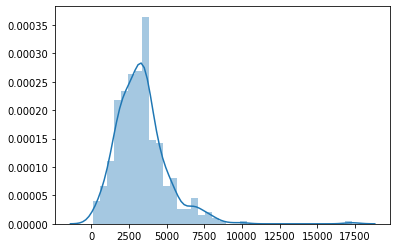

In [160]:
import seaborn as sns

sns.distplot(doc_len);

In [161]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Create a vocabulary and get word counts per document
# Similiar to fit_predict
dtm = tfidf.fit_transform(big_test_list)

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,ab,abernathy,abilities,abilitiesnproblem,ability,able,absence,absolutely,abstract,abundant,...,youre,youve,youxexxll,youxexxre,youxexxve,yrs,zeus,zf,zfxexxs,zillow
0,0.0,0.0,0.0,0.0,0.063823,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.030361,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [164]:
def tokenize_2(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

In [169]:
# Tunning Parameters

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', 
                        max_features = 20,
                        ngram_range=(1,2),
                        max_df=.97,
                        min_df=3,
                        tokenizer=tokenize_2)

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(big_test_list) # Similiar to fit_predict

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,,analysis,analytic,build,business,data,datum,experience,help,learn,machine,model,new,opportunity,product,science,scientist,statistical,team,work
0,0.254263,0.0,0.00000,0.000000,0.000000,0.000000,0.226571,0.500173,0.000000,0.000000,0.315740,0.626722,0.000000,0.000000,0.000000,0.276429,0.000000,0.000000,0.000000,0.254866
1,0.364195,0.0,0.00000,0.113924,0.101410,0.272500,0.081133,0.358213,0.351497,0.113924,0.339189,0.112211,0.243626,0.000000,0.230175,0.197973,0.099706,0.000000,0.275749,0.365059
2,0.000000,0.0,0.00000,0.210514,0.562168,0.335691,0.149920,0.000000,0.000000,0.210514,0.208923,0.414697,0.000000,0.000000,0.000000,0.182911,0.368480,0.216503,0.000000,0.168643
3,0.560221,0.0,0.00000,0.000000,0.000000,0.000000,0.332805,0.000000,0.000000,0.000000,0.000000,0.000000,0.249837,0.230144,0.000000,0.000000,0.000000,0.000000,0.565559,0.374367
4,0.000000,0.0,0.53945,0.000000,0.439725,0.393864,0.351801,0.000000,0.000000,0.000000,0.000000,0.486561,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [170]:
dtm.shape

(426, 20)

In [171]:
dtm.max(axis=1).max()

1.0

## 4) Visualize the most common word counts

In [173]:
print(dtm.columns)

Index(['', 'analysis', 'analytic', 'build', 'business', 'data', 'datum',
       'experience', 'help', 'learn', 'machine', 'model', 'new', 'opportunity',
       'product', 'science', 'scientist', 'statistical', 'team', 'work'],
      dtype='object')


In [174]:
col_length = len(dtm.columns)
print(col_length)

20


In [177]:
col_list = []
for i in range(col_length):
    col_list.append(dtm.columns[i])
print(col_list)

['', 'analysis', 'analytic', 'build', 'business', 'data', 'datum', 'experience', 'help', 'learn', 'machine', 'model', 'new', 'opportunity', 'product', 'science', 'scientist', 'statistical', 'team', 'work']


In [180]:
# import the PCA module from sklearn
from sklearn.decomposition import PCA

def get_word_vectors(word_list):
    # converts a list of words into their word vectors
    return [nlp(word).vector for word in word_list]

# list will be list of most popular words


# intialise pca model and tell it to project data down onto 2 dimensions
pca = PCA(n_components=2)

# fit the pca model to our 300D data, this will work out which is the best 
# way to project the data down that will best maintain the relative distances 
# between data points. It will store these intructioons on how to transform the data.
pca.fit(get_word_vectors(col_list))

# Tell our (fitted) pca model to transform our 300D data down onto 2D using the 
# instructions it learnt during the fit phase.
word_vecs_2d = pca.transform(get_word_vectors(col_list))

# let's look at our new 2D word vectors
word_vecs_2d

array([[ 0.10531983, -0.28716354],
       [ 2.95616594,  0.10327117],
       [ 3.36462421,  0.03413491],
       [-2.24580338, -1.19744028],
       [-1.74807773, -0.9492273 ],
       [ 3.17832506, -1.29703143],
       [ 4.11215542, -1.25712592],
       [-2.0330589 , -0.04279875],
       [-2.48454713, -0.03759968],
       [-2.30497417,  0.66836516],
       [-0.45589707, -1.7522776 ],
       [ 0.82578526, -1.96064202],
       [-1.33990278, -0.88816346],
       [-2.30333661,  0.20996895],
       [-0.58881951, -1.79737691],
       [ 0.58648773,  4.16140958],
       [ 0.54009942,  5.16076311],
       [ 3.60720477,  0.34602825],
       [-1.96696379,  0.58031989],
       [-1.80478656,  0.20258589]])

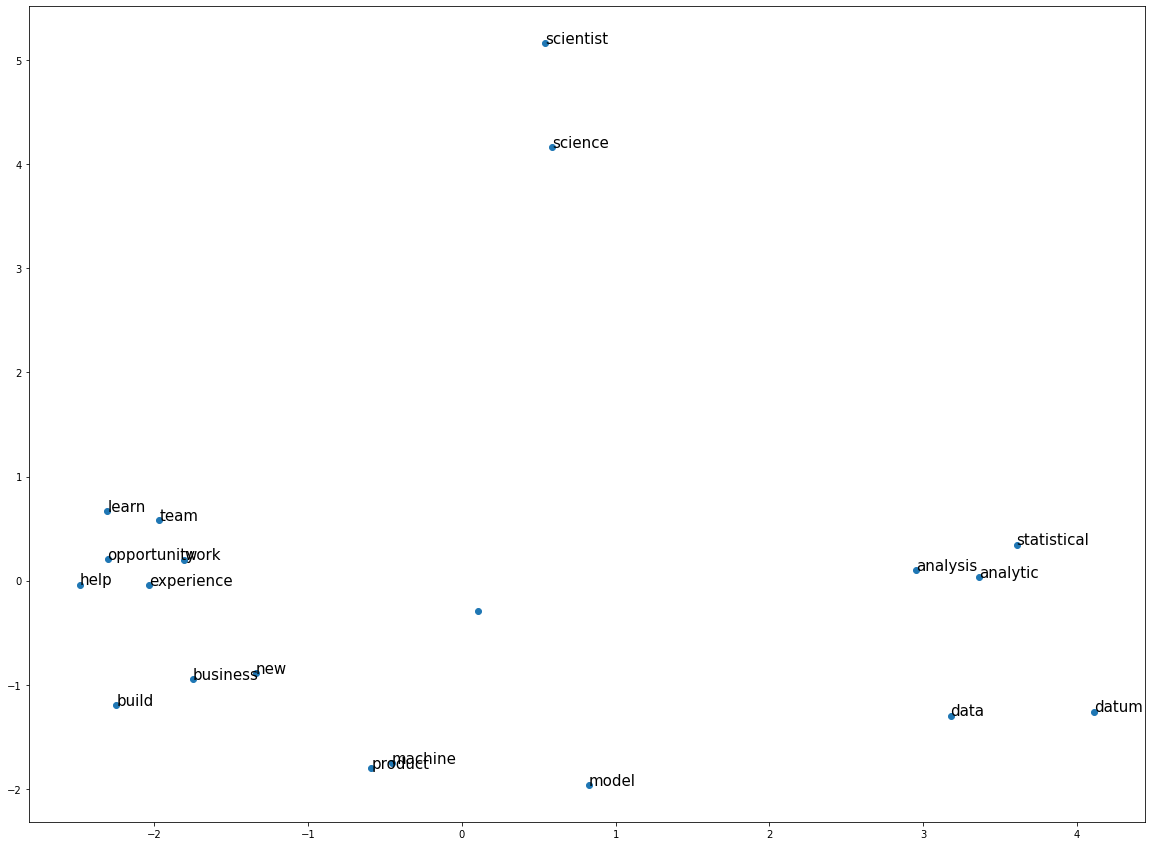

In [182]:
# create a nice big plot 
plt.figure(figsize=(20,15))

# plot the scatter plot of where the words will be
plt.scatter(word_vecs_2d[:,0], word_vecs_2d[:,1])

# for each word and coordinate pair: draw the text on the plot
for word, coord in zip(col_list, word_vecs_2d):
    x, y = coord
    plt.text(x, y, word, size= 15)

# show the plot
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [196]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Create a vocabulary and get word counts per document
# Similiar to fit_predict
dtm = tfidf.fit_transform(big_test_list)

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,ab,abernathy,abilities,abilitiesnproblem,ability,able,absence,absolutely,abstract,abundant,...,youre,youve,youxexxll,youxexxre,youxexxve,yrs,zeus,zf,zfxexxs,zillow
0,0.0,0.0,0.0,0.0,0.063823,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.030361,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [197]:
# Tunning Parameters

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', 
                        max_features = 20,
                        ngram_range=(1,2),
                        max_df=.97,
                        min_df=3,
                        tokenizer=tokenize_2)

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(big_test_list) # Similiar to fit_predict

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,,analysis,analytic,build,business,data,datum,experience,help,learn,machine,model,new,opportunity,product,science,scientist,statistical,team,work
0,0.254263,0.0,0.00000,0.000000,0.000000,0.000000,0.226571,0.500173,0.000000,0.000000,0.315740,0.626722,0.000000,0.000000,0.000000,0.276429,0.000000,0.000000,0.000000,0.254866
1,0.364195,0.0,0.00000,0.113924,0.101410,0.272500,0.081133,0.358213,0.351497,0.113924,0.339189,0.112211,0.243626,0.000000,0.230175,0.197973,0.099706,0.000000,0.275749,0.365059
2,0.000000,0.0,0.00000,0.210514,0.562168,0.335691,0.149920,0.000000,0.000000,0.210514,0.208923,0.414697,0.000000,0.000000,0.000000,0.182911,0.368480,0.216503,0.000000,0.168643
3,0.560221,0.0,0.00000,0.000000,0.000000,0.000000,0.332805,0.000000,0.000000,0.000000,0.000000,0.000000,0.249837,0.230144,0.000000,0.000000,0.000000,0.000000,0.565559,0.374367
4,0.000000,0.0,0.53945,0.000000,0.439725,0.393864,0.351801,0.000000,0.000000,0.000000,0.000000,0.486561,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [183]:
dtm.head()

,,analysis,analytic,build,business,data,datum,experience,help,learn,machine,model,new,opportunity,product,science,scientist,statistical,team,work
0,0.254263,0.0,0.00000,0.000000,0.000000,0.000000,0.226571,0.500173,0.000000,0.000000,0.315740,0.626722,0.000000,0.000000,0.000000,0.276429,0.000000,0.000000,0.000000,0.254866
1,0.364195,0.0,0.00000,0.113924,0.101410,0.272500,0.081133,0.358213,0.351497,0.113924,0.339189,0.112211,0.243626,0.000000,0.230175,0.197973,0.099706,0.000000,0.275749,0.365059
2,0.000000,0.0,0.00000,0.210514,0.562168,0.335691,0.149920,0.000000,0.000000,0.210514,0.208923,0.414697,0.000000,0.000000,0.000000,0.182911,0.368480,0.216503,0.000000,0.168643
3,0.560221,0.0,0.00000,0.000000,0.000000,0.000000,0.332805,0.000000,0.000000,0.000000,0.000000,0.000000,0.249837,0.230144,0.000000,0.000000,0.000000,0.000000,0.565559,0.374367
4,0.000000,0.0,0.53945,0.000000,0.439725,0.393864,0.351801,0.000000,0.000000,0.000000,0.000000,0.486561,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [184]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [185]:
nn.kneighbors([dtm.iloc[0].values])

(array([[0.        , 0.61411742, 0.61411742, 0.62811404, 0.65513921]]),
 array([[  0,  11, 181,  72, 126]]))

In [186]:
# Query Using kneighbors 
nn.kneighbors([dtm.iloc[256]])

(array([[0.        , 0.49336761, 0.55700889, 0.55700889, 0.56674114]]),
 array([[256, 201,  50,  90, 115]]))

In [189]:
print(no_new_lines)

bCerner Intelligence is a new innovative organization within Cerner focusing on creating contextual intelligent experiences by leveraging the power of data to discover new evidencebased insights and workflow interventions that drive client value and help achieve the quadruple aim in healthcare We seek the best and brightest talent to join the team xexx individuals who thrive on analytical problem solving and datadriven analysis who are smart ambitious and inquisitivennAs a Data Scientist you will discover and develop mathematical models to improve clinical financial or operational outcomes at an individual facility or population level using advanced mathematical computational and machine learning techniques A few of the responsibilities include supporting feasibility studies applying modern data storage techniques discovering explanatory features in highdimensionality collections of data exploring data using scientifically valid techniques to applying a modern software or analytic deve

In [192]:
job_descr = ["""
bCerner Intelligence is a new innovative organization within Cerner focusing on creating contextual intelligent experiences by leveraging the power of data to discover new evidencebased insights and workflow interventions that drive client value and help achieve the quadruple aim in healthcare We seek the best and brightest talent to join the team xexx individuals who thrive on analytical problem solving and datadriven analysis who are smart ambitious and inquisitivennAs a Data Scientist you will discover and develop mathematical models to improve clinical financial or operational outcomes at an individual facility or population level using advanced mathematical computational and machine learning techniques A few of the responsibilities include supporting feasibility studies applying modern data storage techniques discovering explanatory features in highdimensionality collections of data exploring data using scientifically valid techniques to applying a modern software or analytic development lifecycle methodologynnClient ServicesnWorking directly with our clients is one of the most impactful careers you will find Whether your background is in health care business or technology you can help transform the quality of care for all of usnQualificationsnBasic QualificationsnMasterxexxs Degree in Statistics Computer Science Analytics Biostatistics Applied Mathematics Software Engineering or equivalent relevant work experiencenAt least  years of data mining quantitative analysis andor statistical modeling including predictive performance and algorithm optimization work experiencenExperience working with data mining algorithms including decision trees probability networks association rules clustering and neural networksnExperience programming in multiple languages ideally Python andor RnExperience with MapReduce programming HadoopnExperience with data warehousing and business intelligence systems cluster and grid computingnPreferred QualificationsnPhD in Statistics Computer Science Analytics Biostatistics Applied Mathematics Software Engineering or equivalent relevant work experiencenAt least  years of machine learning methods and the principals of visually encoding data work experiencenExperience with relational databases and SQL NoSQL databases hBase Cassandra MongoDB Couch DB Riak and unstructured data Spark Pig and AvronExperience with agile software development methodologiesnExpectationsnMust be currently residing in or willing to relocate to the Malvern PA metro areanWilling to work additional or irregular hours as needed and allowed by local regulationsnWork in accordance with corporate and organizational security policies and procedures understand personal role in safeguarding corporate and client assets and take appropriate action to prevent and report any compromises of security within scope of positionnAdditional InformationnApplicants for US based positions with Cerner Corporation must be legally authorized to work in the United States Verification of employment eligibility will be required at the time of hire Visa sponsorship may be available for this positionnnSome Cerner positions may be obligated to comply with clientfacing requirements and occupational health requests including but not limited to an immunization set an annual flu shot an annual TB screen an updated background check andor an updated drug screennRelocation Assistance Available for this JobnYes  DomesticRegionalnVirtual Eligible JobnNonCerner is a place where people are encouraged to innovate with confidence and focus on what is important xexx peoplexexxs health and the care they receive We are transforming health care by developing tools and technologies that make it more efficient for care providers and patients to navigate the complexity of our health From single offices to entire countries Cerner solutions are licensed at more than  facilities in over  countriesnnCernerxexxs policy is to provide equal opportunity to all people without regard to race color religion national origin ancestry marital status veteran status age disability pregnancy genetic information citizenship status sex sexual orientation gender identity or any other legally protected category Cerner is proud to be a drugfree workplace


"""]

In [193]:
# Query for Sim of Random doc to BBC
new = tfidf.transform(job_descr)

In [194]:
new

<1x20 sparse matrix of type '<class 'numpy.float64'>'
	with 17 stored elements in Compressed Sparse Row format>

In [195]:
nn.kneighbors(new.todense())

(array([[0.12789527, 0.39764013, 0.40735162, 0.43682538, 0.44714701]]),
 array([[425, 360, 380, 116,  60]]))

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 